In [1]:
import os
import yaml
import random

import numpy as np
import pandas as pd
import tensorflow as tf
from PIL import Image

import matplotlib.pyplot as plt

np.set_printoptions(precision=4)

LABELS_PATH="labels.yaml"
IMAGES_BASE="/workspaces/motion/images/esp32/good"
BATCH_SIZE=10

2023-06-04 17:51:16.865532: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-04 17:51:17.626659: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
tf.config.list_physical_devices()

2023-06-04 17:51:18.728729: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-06-04 17:51:18.855241: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-06-04 17:51:18.855291: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.


[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
with open(LABELS_PATH) as f:
    label_map = yaml.load(f, Loader=yaml.SafeLoader)["labels"]
reverse_label_map = {v:k for k,v in label_map.items()}

examples = []
examples_labels = []
for dir,_,files in os.walk(IMAGES_BASE):
    for file in files:
        examples.append(np.asarray(Image.open(os.path.join(dir, file)).point(lambda x: 255 if x>0 else 0), dtype=np.float32).reshape(29, 40, 1))
        examples_labels.append(label_map[os.path.basename(dir)])
examples_numpy = np.asarray(examples)
examples_labels_numpy = np.asanyarray(examples_labels)

ds = tf.data.Dataset.from_tensor_slices((examples_numpy, examples_labels_numpy))
ds = ds.shuffle(buffer_size=2000, reshuffle_each_iteration=False).batch(BATCH_SIZE)
display(ds)

val_ds = ds.take(10)
test_ds = ds.skip(10).take(10)
train_ds = ds.skip(20)

for batch in train_ds:
    print(batch[1])

2023-06-04 17:51:19.021338: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-06-04 17:51:19.021462: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-06-04 17:51:19.021498: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-06-04 17:51:19.860103: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-06-04 17:51:19.860226: I tensorflow/compile

<_BatchDataset element_spec=(TensorSpec(shape=(None, 29, 40, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

tf.Tensor([0 7 2 3 7 3 6 3 7 3], shape=(10,), dtype=int64)
tf.Tensor([2 2 5 0 4 2 3 4 0 5], shape=(10,), dtype=int64)
tf.Tensor([2 3 0 4 5 1 0 7 2 6], shape=(10,), dtype=int64)
tf.Tensor([0 7 7 7 3 7 0 3 1 2], shape=(10,), dtype=int64)
tf.Tensor([5 7 1 1 1 5 1 3 5 3], shape=(10,), dtype=int64)
tf.Tensor([2 4 2 3 1 5 4 4 3 7], shape=(10,), dtype=int64)
tf.Tensor([1 2 5 0 2 6 4 3 4 4], shape=(10,), dtype=int64)
tf.Tensor([1 4 3 0 2 3 5 0 3 7], shape=(10,), dtype=int64)
tf.Tensor([1 4 7 2 5 4 7 1 3 2], shape=(10,), dtype=int64)
tf.Tensor([4 4 4 1 2 4 4 2 0 3], shape=(10,), dtype=int64)
tf.Tensor([7 2 0 2 4 7 3 1 6 2], shape=(10,), dtype=int64)
tf.Tensor([4 2 4 3 3 4 0 0 6 5], shape=(10,), dtype=int64)
tf.Tensor([3 6 2 0 4 2 6 6 4 4], shape=(10,), dtype=int64)
tf.Tensor([6 4 4 6 2 3 7 2 2 2], shape=(10,), dtype=int64)
tf.Tensor([3 4 2 2 0 2 5 5 2 0], shape=(10,), dtype=int64)
tf.Tensor([2 5 2 1 0 5 2 4 4 5], shape=(10,), dtype=int64)
tf.Tensor([7 4 4 5 6 4 6 0 0 4], shape=(10,), dtype=int6

2023-06-04 17:51:20.346623: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [638]
	 [[{{node Placeholder/_1}}]]


In [4]:
# NetConfig(conv_layers=2, conv_per_layer=4, conv_kernel_shape=(3, 3), dropout1=0.7, dropout2=0.7, dense_size=256)
tf.debugging.set_log_device_placement(True)
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(4, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(4, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(strides=(2,2)),
    tf.keras.layers.Dropout(0.7),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.7),
    tf.keras.layers.Dense(8, activation='softmax')
])

model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

model.fit(
    train_ds,
    epochs=30,
    validation_data=val_ds,
)

Epoch 1/30


/home/vscode/.local/lib/python3.10/site-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2023-06-04 17:51:20.968816: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
2023-06-04 17:51:21.914307: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8700
2023-06-04 17:51:22.901312: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x556b2326d370 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-06-04 17:51:22.901356: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): NVIDIA GeFor

44/44 [==============================] - 4s 9ms/step - loss: 100.2522 - accuracy: 0.1941 - val_loss: 6.1633 - val_accuracy: 0.6600
Epoch 2/30
15/44 [=========>....................] - ETA: 0s - loss: 35.6730 - accuracy: 0.3533

2023-06-04 17:51:24.257272: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [638]
	 [[{{node Placeholder/_1}}]]
2023-06-04 17:51:24.257491: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [638,29,40,1]
	 [[{{node Placeholder/_0}}]]


44/44 [==============================] - 0s 5ms/step - loss: 26.7829 - accuracy: 0.3676 - val_loss: 1.1890 - val_accuracy: 0.8400
Epoch 3/30
44/44 [==============================] - 0s 5ms/step - loss: 14.5719 - accuracy: 0.3950 - val_loss: 0.9869 - val_accuracy: 0.7800
Epoch 4/30
44/44 [==============================] - 0s 5ms/step - loss: 9.4892 - accuracy: 0.4292 - val_loss: 0.5139 - val_accuracy: 0.8700
Epoch 5/30
44/44 [==============================] - 0s 5ms/step - loss: 6.4033 - accuracy: 0.4498 - val_loss: 0.3243 - val_accuracy: 0.8900
Epoch 6/30
44/44 [==============================] - 0s 5ms/step - loss: 5.9513 - accuracy: 0.4247 - val_loss: 0.2647 - val_accuracy: 0.9200
Epoch 7/30
44/44 [==============================] - 0s 5ms/step - loss: 3.9940 - accuracy: 0.5297 - val_loss: 0.4262 - val_accuracy: 0.8800
Epoch 8/30
44/44 [==============================] - 0s 5ms/step - loss: 4.1125 - accuracy: 0.4954 - val_loss: 0.2407 - val_accuracy: 0.9400
Epoch 9/30
44/44 [===========

In [5]:
b = next(iter(test_ds))
img_array = b[0][0]
print(reverse_label_map[b[1][0].numpy()])
array_shaped = img_array.numpy().reshape(29,40)
print(array_shaped.shape)
display(Image.fromarray(array_shaped*255).convert("RGB"))
print(np.expand_dims(np.squeeze(img_array), axis=0).shape)
r = model.predict(np.expand_dims(np.squeeze(img_array), axis=0))
print([f"{i:.4f}" for i in r[0]])
print(np.max(r))
raw_pred = tf.argmax(r, 1).numpy()[0]
print(reverse_label_map[raw_pred])

tarantallegra
(29, 40)


2023-06-04 17:51:31.206711: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [638,29,40,1]
	 [[{{node Placeholder/_0}}]]
2023-06-04 17:51:31.207060: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [638,29,40,1]
	 [[{{node Placeholder/_0}}]]


(1, 29, 40)
1/1 [==============================] - 0s 147ms/step
['0.0402', '0.0033', '0.0019', '0.0333', '0.0038', '0.8911', '0.0203', '0.0061']
0.891089
tarantallegra


1/1 [==============================] - 0s 17ms/step


Text(0.5, 1.0, 'Confusion Matrix')

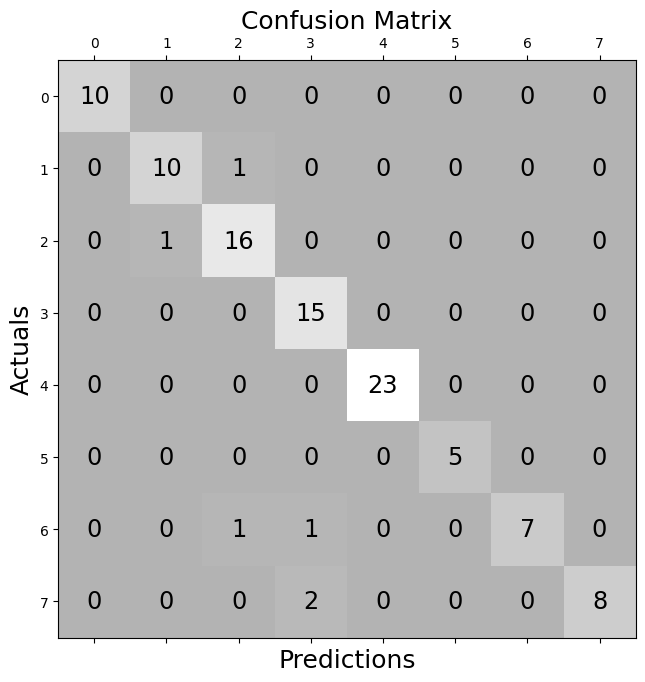

In [6]:
real_classes = []
pred_classes = []

for batch in test_ds:
    preds = model.predict(batch)
    pred_classes.extend(tf.argmax(preds, 1).numpy())
    real_classes.extend(batch[1].numpy())

conf_matrix = tf.math.confusion_matrix(real_classes, pred_classes)

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.gray, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j].numpy(), va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)

In [8]:
model.save("output")

INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(3, 3, 1, 4), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd5bb9f03d0>, 140556832173040), {}).


2023-06-04 17:52:30.267503: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,14,20,4]
	 [[{{node inputs}}]]
2023-06-04 17:52:30.283296: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,256]
	 [[{{node inputs}}]]
INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(3, 3, 1, 4), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd5bb9f03d0>, 140556832173040), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(4,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd5bb9f2140>, 140556977981296), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(4,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd5bb9f2140>, 140556977981296), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(3, 3, 4, 4), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd5b813c430>, 140556832310176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(3, 3, 4, 4), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd5b813c430>, 140556832310176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(4,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd5b813c850>, 140556832309856), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(4,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd5b813c850>, 140556832309856), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1120, 256), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd5f0097c10>, 140556832318176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1120, 256), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd5f0097c10>, 140556832318176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd5b817d780>, 140556878815536), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd5b817d780>, 140556878815536), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256, 8), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd5b817f550>, 140556832348784), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256, 8), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd5b817f550>, 140556832348784), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd5b81a53c0>, 140557116591440), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd5b81a53c0>, 140557116591440), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(3, 3, 1, 4), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd5bb9f03d0>, 140556832173040), {}).


2023-06-04 17:52:30.482427: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,14,20,4]
	 [[{{node inputs}}]]
2023-06-04 17:52:30.520932: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,256]
	 [[{{node inputs}}]]
INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(3, 3, 1, 4), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd5bb9f03d0>, 140556832173040), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(4,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd5bb9f2140>, 140556977981296), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(4,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd5bb9f2140>, 140556977981296), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(3, 3, 4, 4), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd5b813c430>, 140556832310176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(3, 3, 4, 4), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd5b813c430>, 140556832310176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(4,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd5b813c850>, 140556832309856), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(4,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd5b813c850>, 140556832309856), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1120, 256), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd5f0097c10>, 140556832318176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1120, 256), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd5f0097c10>, 140556832318176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd5b817d780>, 140556878815536), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd5b817d780>, 140556878815536), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256, 8), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd5b817f550>, 140556832348784), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256, 8), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd5b817f550>, 140556832348784), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd5b81a53c0>, 140557116591440), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd5b81a53c0>, 140557116591440), {}).


INFO:tensorflow:Assets written to: output/assets


INFO:tensorflow:Assets written to: output/assets
